In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import gym
import random
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
from grid_world import GridWorldEnv

# Convergence of Q and SARSA for Differente Hyperparameters

In [8]:
def Q_SARSA(mode, level, learning_rate, decay, epsilon, episode_length, n_episode):
    env = GridWorldEnv(mode, level, learning_rate, decay, epsilon)
    env = env.unwrapped
    episode_array = []
    reward_array = []
    for epi in range(n_episode):
        observation = env._reset()
        episode_array.append(epi)
        reward_sum = 0
        for t in range(episode_length):
            action = env.action()
            observation, reward, done, info = env._step(action)
            reward_sum += reward
        reward_array.append(reward_sum)
    return episode_array, reward_array

## 1. Q Easy

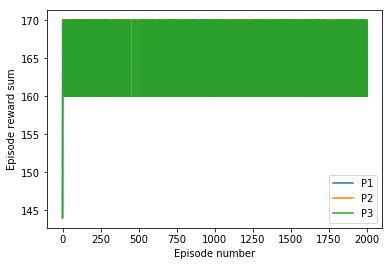

In [23]:
# mode, level, learning_rate, decay, epsilon, episode_length, n_episode
q_episode_1, q_reward_1 = Q_SARSA('Q', 'easy', 0.1, 0.9, 0.1, 100, 2000)
q_episode_2, q_reward_2 = Q_SARSA('Q', 'easy', 0.5, 0.9, 0.1, 100, 2000)
q_episode_3, q_reward_3 = Q_SARSA('Q', 'easy', 0.1, 0.6, 0.1, 100, 2000)
plt.plot(q_episode_1, q_reward_1, label='P1')
plt.plot(q_episode_2, q_reward_2, label='P2')
plt.plot(q_episode_3, q_reward_3, label='P3')
plt.xlabel('Episode number')
plt.ylabel('Episode reward sum')
plt.legend()
plt.show()

There isn't much difference with the choice of hyperparameters.

## 2. Q Hard

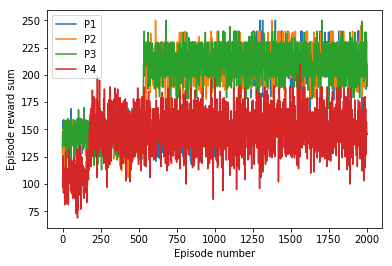

In [19]:
# mode, level, learning_rate, decay, epsilon, episode_length, n_episode
q_episode_1, q_reward_1 = Q_SARSA('Q', 'hard', 0.1, 0.9, 0.1, 100, 2000)
q_episode_2, q_reward_2 = Q_SARSA('Q', 'hard', 0.5, 0.9, 0.1, 100, 2000)
q_episode_3, q_reward_3 = Q_SARSA('Q', 'hard', 0.1, 0.6, 0.1, 100, 2000)
q_episode_4, q_reward_4 = Q_SARSA('Q', 'hard', 0.1, 0.9, 0.3, 100, 2000)
plt.plot(q_episode_1, q_reward_1, label='P1')
plt.plot(q_episode_2, q_reward_2, label='P2')
plt.plot(q_episode_3, q_reward_3, label='P3')
plt.plot(q_episode_4, q_reward_4, label='P4')
plt.xlabel('Episode number')
plt.ylabel('Episode reward sum')
plt.legend()
plt.show()

We can see that the choice of different learning rate alpha and decay rate sigma don't cause much difference. But the high epsilon one has a obvious lower convergence rate and also a lower reward sum. Compared the the easy Q, it has a higher reward sum, so it means that the exploration takes effect.

## 3. SARSA Easy

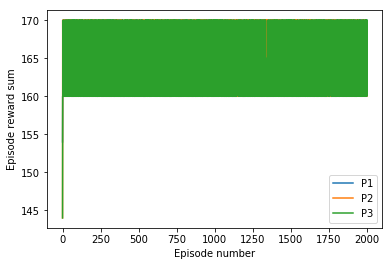

In [24]:
# mode, level, learning_rate, decay, epsilon, episode_length, n_episode
s_episode_1, s_reward_1 = Q_SARSA('SARSA', 'easy', 0.1, 0.9, 0.1, 100, 2000)
s_episode_2, s_reward_2 = Q_SARSA('SARSA', 'easy', 0.5, 0.9, 0.1, 100, 2000)
s_episode_3, s_reward_3 = Q_SARSA('SARSA', 'easy', 0.1, 0.6, 0.1, 100, 2000)
plt.plot(s_episode_1, s_reward_1, label='P1')
plt.plot(s_episode_2, s_reward_2, label='P2')
plt.plot(s_episode_3, s_reward_3, label='P3')
plt.xlabel('Episode number')
plt.ylabel('Episode reward sum')
plt.legend()
plt.show()

The same with Q easy, there isn't much difference with the choice of hyperparameters.

## 4. SARSA Hard

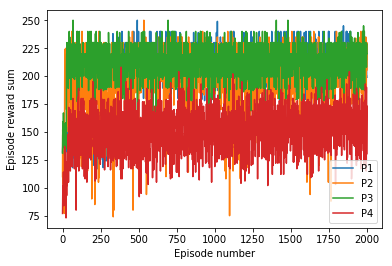

In [34]:
# mode, level, learning_rate, decay, epsilon, episode_length, n_episode
s_episode_1, s_reward_1 = Q_SARSA('SARSA', 'hard', 0.1, 0.9, 0.1, 100, 2000)
s_episode_2, s_reward_2 = Q_SARSA('SARSA', 'hard', 0.5, 0.9, 0.1, 100, 2000)
s_episode_3, s_reward_3 = Q_SARSA('SARSA', 'hard', 0.1, 0.6, 0.1, 100, 2000)
s_episode_4, s_reward_4 = Q_SARSA('SARSA', 'hard', 0.1, 0.9, 0.3, 100, 2000)
plt.plot(s_episode_1, s_reward_1, label='P1')
plt.plot(s_episode_2, s_reward_2, label='P2')
plt.plot(s_episode_3, s_reward_3, label='P3')
plt.plot(s_episode_4, s_reward_4, label='P4')
plt.xlabel('Episode number')
plt.ylabel('Episode reward sum')
plt.legend()
plt.show()

We can see that the choice of different decay rate sigma don't cause much difference. But the high epsilon one has a lower reward sum and a slightly lower convergence rate. And the high learning rate alpha one has a big fluctuation on reward sum. Compared the the hard Q, it conver in fewer steps.

# Sample Trajectories and Final Q Value

In [51]:
def Q_SARSA_sample(mode, level, learning_rate, decay, epsilon, episode_length, n_episode):
    env = GridWorldEnv(mode, level, learning_rate, decay, epsilon)
    env = env.unwrapped
    episode_array = []
    reward_array = []
    for epi in range(n_episode):
        observation = env._reset()
        episode_array.append(epi)
        reward_sum = 0
        for t in range(episode_length):
            action = env.action()
            observation, reward, done, info = env._step(action)
            reward_sum += reward
            print('x = {}, y = {}, action = {}, rewards = {}'.format(observation[0], observation[1], action, reward))
        reward_array.append(reward_sum)
    return episode_array, reward_array, env

In [54]:
q_episode, q_reward, env = Q_SARSA_sample('SARSA', 'hard', 0.1, 0.9, 0.1, 100, 200)

x = 1, y = 3, action = 1, rewards = 0
x = 2, y = 3, action = 1, rewards = 5
x = 2, y = 2, action = 0, rewards = 0
x = 2, y = 1, action = 0, rewards = 0
x = 2, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 0, rewards = -1
x = 1, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 0, rewards = -1
x = 0, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 0, rewards = -1
x = 0, y = 0, action = 1, rewards = -1
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 4, y = 0, action = 0, rewards = -1
x = 3, y = 0, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = -1
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x =

x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 0, rewards = -1
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, 

x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 1, action = 0, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 4, y = 0, action = 3, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, 

x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 0, rewards = -1
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 2, action = 2, rewards = 0
x = 4, y = 1, action = 0, rewards = 0
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 4, y = 0, action = 0, rewards = -1
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, 

x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 2, action = 2, rewards = 0
x = 4, y = 1, action = 0, rewards = 0
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 3, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y

x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = -1
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 0, rewards = -1
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4,

x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = -1
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = -1
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3,

x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = -1
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 3, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y

x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 2, action = 2, rewards = 0
x = 4, y = 1, action = 0, rewards = 0
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 0, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y

x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 0, rewards = -1
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 3, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 3, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 2, action = 2, rewards = 0
x = 4, 

x = 1, y = 0, action = 1, rewards = 0
x = 1, y = 1, action = 2, rewards = 0
x = 1, y = 0, action = 0, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 4, y = 1, action = 2, rewards = 0
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y

x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = -1
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4,

x = 4, y = 0, action = 3, rewards = -1
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = -1
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 1, action = 3, rewards = -1
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4

x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 0, action = 1, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 1, y = 1, action = 2, rewards = 0
x = 1, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 3, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 2, y = 1, action = 2, rewards = 0
x = 2, y = 0, action = 0, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y 

x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 2, action = 2, rewards = 0
x = 4, y = 1, action = 0, rewards = 0
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 4, y = 1, action = 3, rewards = 0
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 2, y = 1, action = 2, rewards = 0
x = 3, y = 1, action = 3, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 2, y = 1, action = 2, rewards = 0
x = 2, y 

x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 1, action = 3, rewards = -1
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, 

x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 2, action = 2, rewards = 0
x = 4, y = 1, action = 0, rewards = 0
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 2, action = 1, rewards = 0
x = 4, y = 1, action = 0, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 0, rewards = -1
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y

x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = -1
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 2, action = 2, rewards = 0
x = 3, y = 1, action = 0, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 0, y

x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 1, y = 1, action = 2, rewards = 0
x = 1, y = 0, action = 0, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 3, y = 0, action = 0, rewards = -1
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y

x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 3, y = 0, action = 3, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 2, y = 1, action = 2, rewards = 0
x = 2, y = 0, action = 0, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 4, y = 1, action = 2, rewards = 10
x = 4, y = 1, action = 3, rewards = -1
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, y = 0, action = 1, rewards = 0
x = 1, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 1, rewards = 0
x = 0, y = 0, action = 0, rewards = -1
x = 4, y = 1, action = 2, rewards = 10
x = 3, y = 1, action = 1, rewards = 0
x = 3, y = 0, action = 0, rewards = 0
x = 2, 

In [55]:
env.draw()

--------------------------------------------------------------------------------------
|     -1.000     |     0.000      |     0.000      |     0.000      |     0.000      |
|-0.999    17.029|8.108      0.000|12.960     0.971|3.158      0.000|4.197     -0.100|
|     12.437     |     0.000      |     0.000      |     0.441      |     0.000      |
--------------------------------------------------------------------------------------
|     14.558     |     0.000      |     1.017      |     6.685      |     0.000      |
|-1.000    10.184|12.906     0.407|6.819      0.000|0.515      0.041|1.985      0.000|
|     10.789     |     1.287      |     0.000      |     0.000      |     0.000      |
--------------------------------------------------------------------------------------
|     12.361     |     6.853      |     0.199      |     0.289      |     0.000      |
|-1.000     8.394|9.357      1.958|8.674      0.574|6.514      0.000|1.294     -0.190|
|     9.885      |     3.318      |     0.6